# Loading Libraries , packages and modules for project

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score


# Loading Data file

In [110]:
df = pd.read_csv('HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [111]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


# Data exploration

In [112]:
df.shape

(1470, 35)

In [113]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [114]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [115]:
df.index

RangeIndex(start=0, stop=1470, step=1)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [117]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Exploratory Data Analysis (EDA)

## Data Distributions 

In [118]:
#Target column is Attrition
df['Attrition'].unique() # finding the number of classes


array(['Yes', 'No'], dtype=object)

In [119]:
print (df['Attrition'].value_counts())
print ('*****************', '\n')
#Percentage ratios of classes or class balance check
print ('the percentage of Attrition is with Yes: ',round(df['Attrition'].value_counts()[0]/len(df), 2)*100, '%')
print ('the percentage of Attrition is with Yes: ',round(df['Attrition'].value_counts()[1]/len(df), 2)*100, '%')

No     1233
Yes     237
Name: Attrition, dtype: int64
***************** 

the percentage of Attrition is with Yes:  84.0 %
the percentage of Attrition is with Yes:  16.0 %


In [120]:
print (df['BusinessTravel'].value_counts())
print ('\n','*****************', '\n')


Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

 ***************** 



In [121]:
print (df['Department'].value_counts())
print ('\n','*****************', '\n')
#Percentage ratios of classes or class balance check


Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

 ***************** 



In [122]:
print (df['Gender'].value_counts())
print ('\n','*****************', '\n')


Male      882
Female    588
Name: Gender, dtype: int64

 ***************** 



Text(-2.700000000000003, 0.5, 'number of employees')

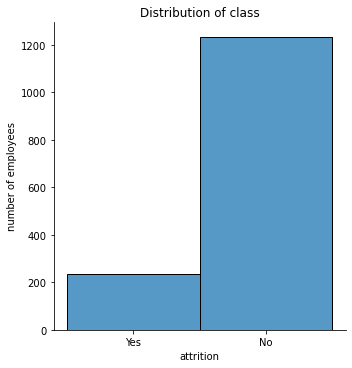

In [123]:
# distribution map
sns.displot(df['Attrition'])
plt.title('Distribution of class')
plt.xlabel('attrition')
plt.ylabel('number of employees')

In [ ]:
sns.pairplot(data = df)

In [ ]:
sns.pairplot(data = df, hue='Attrition')

# Missing Values

In [ ]:
df.isnull().sum()

## Outliers Identification and Treatment

In [ ]:
def outlier_iqr(input_data):
    q1=input_data.quantile(0.25)
    q3=input_data.quantile(0.75)
    iqr = q3-q1
    lower_whisker = q1-(1.5*iqr)
    upper_whisker = q3+(1.5*iqr)
    outlier_list = []
    for i in input_data:
        if i>upper_whisker or i<lower_whisker:
            outlier_list.append(i)
    print ('outliers are', outlier_list)
    print ('lower_whisker value :', lower_whisker, 'upper_whisker value', upper_whisker)
    return ('lower_whisker value :', lower_whisker, 'upper_whisker value', upper_whisker)

In [ ]:
df.columns

In [ ]:
df.dtypes ==object

In [ ]:
#Quantifying Outliers
cols=['Age', 'DailyRate', 'DistanceFromHome', 'Education','EmployeeCount','EmployeeNumber', 
      'EnvironmentSatisfaction', 'HourlyRate','JobInvolvement', 'JobLevel',
      'JobSatisfaction','MonthlyIncome', 'MonthlyRate', 
      'NumCompaniesWorked','PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']
for i in cols:
    print('*****',i)
    outlier_iqr(df[i])
    print('*****')

In [ ]:
#Infereance: 
#There are no several outliers in data , except monthly income ., however That is very important colmn to decide wheather employee will attrion or not

In [ ]:
#Encoding categorical lables

## Encoding the lables

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Attrition']=le.fit_transform(df['Attrition'])
df.head()

In [ ]:
X=pd.get_dummies(df)
X.head()

# Feature Engineering

In [ ]:
corr = X.corr()
corr

In [ ]:
sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True, cmap='viridis')

# Feature Selection

In [ ]:
X.drop('Attrition', axis=1, inplace=True)

In [ ]:
Y = df['Attrition']
Y

# Data Splitting 

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=200) 
x_train

## Data Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler= StandardScaler(with_mean=True, with_std=True)
x_train = std_scaler.fit_transform(x_train)
x_test = std_scaler.fit_transform(x_test)
x_train = pd.DataFrame(x_train, columns=X.columns)
x_test = pd.DataFrame(x_test, columns=X.columns)
x_train.head()

# Classification Models

## Support Vector Machine (SVC)

In [ ]:
from sklearn.svm import SVC
svc_model=SVC(kernel='rbf', gamma='auto', probability=False)
svc_model.fit(x_train, y_train)
svc_pred = svc_model.predict(x_test)
df1_svc = pd.DataFrame({'real_value':y_test, 'svc_predict':svc_pred})
print (svc_pred)
df1_svc

In [ ]:
from sklearn.metrics import confusion_matrix
print ('confusion matrix', confusion_matrix(y_test, svc_pred))
print ('*****************************')
print ('accuracy score', round(accuracy_score(y_test, svc_pred)*100, 2), '%')
print ('*****************************')
print ('precision score', round(precision_score(y_test, svc_pred, average='micro')*100, 2), '%')
print ('*****************************')
print ('recall score', round(recall_score(y_test, svc_pred)*100, 2), '%')
print ('*****************************')
print ('f1- score', round(f1_score(y_test, svc_pred)*100, 2), '%')

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LR_model=LogisticRegression(fit_intercept=True)
LR_model.fit(x_train, y_train)
LR_pred = LR_model.predict(x_test)
df1_LR = pd.DataFrame({'real_value':y_test, 'svc_predict':LR_pred})
print (LR_pred)
df1_LR

In [ ]:
print ('confusion matrix', confusion_matrix(y_test, LR_pred))
print ('*****************************')
print ('accuracy score', round(accuracy_score(y_test, LR_pred)*100, 2), '%')
print ('*****************************')
print ('precision score', round(precision_score(y_test, LR_pred)*100, 2), '%')
print ('*****************************')
print ('recall score', round(recall_score(y_test, LR_pred)*100, 2), '%')
print ('*****************************')
print ('f1- score', round(f1_score(y_test, LR_pred)*100, 2), '%')

## Naive Bayes Algorithm

In [ ]:
from sklearn.naive_bayes import GaussianNB
NB_model=GaussianNB()
NB_model.fit(x_train, y_train)
NB_pred = NB_model.predict(x_test)
df1_NB = pd.DataFrame({'real_value':y_test, 'NB_predict':NB_pred})
print (NB_pred)
df1_NB

In [ ]:
print ('confusion matrix', confusion_matrix(y_test, NB_pred))
print ('*****************************')
print ('accuracy score', round(accuracy_score(y_test, NB_pred)*100, 2), '%')
print ('*****************************')
print ('precision score', round(precision_score(y_test, NB_pred)*100, 2), '%')
print ('*****************************')
print ('recall score', round(recall_score(y_test, NB_pred)*100, 2), '%')
print ('*****************************')
print ('f1- score', round(f1_score(y_test, NB_pred)*100, 2), '%')

## Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT_model=DecisionTreeClassifier(criterion='gini', splitter='best', random_state=None)
DT_model.fit(x_train, y_train)
DT_pred = NB_model.predict(x_test)
df1_DT = pd.DataFrame({'real_value':y_test, 'DT_predict':DT_pred})
print (DT_pred)
df1_DT

In [ ]:
print ('confusion matrix', confusion_matrix(y_test, DT_pred))
print ('*****************************')
print ('accuracy score', round(accuracy_score(y_test, DT_pred)*100, 2), '%')
print ('*****************************')
print ('precision score', round(precision_score(y_test, DT_pred)*100, 2), '%')
print ('*****************************')
print ('recall score', round(recall_score(y_test, DT_pred)*100, 2), '%')
print ('*****************************')
print ('f1- score', round(f1_score(y_test, DT_pred)*100, 2), '%')

# Ensemble methods


### Bagging - Random Forest

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
rf_model=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=20,random_state=400,
                      base_estimator=DecisionTreeClassifier(criterion='gini'))
rf_model.fit(x_train,y_train) # fitting our bagging tree ensemble using fit method
print (rf_model.oob_score_*100)

In [ ]:
list1=list(range(10, 300, 20))
list1

In [ ]:
for w in range(10,300,20):
    rf_model=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=w,random_state=400,
                          base_estimator=DecisionTreeClassifier())
    rf_model.fit(x_train,y_train)
    oob=rf_model.oob_score_*100
    print ('For n_estimators = '+str(w))
    print ('OOB score is =' +str(oob))
    print ('************************')
    

In [ ]:
rf_model=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=170,random_state=400,
                      base_estimator=DecisionTreeClassifier())
rf_model.fit(x_train,y_train) # fitting bagged tree classifier  model 

In [ ]:
imp=[]
for i in rf_model.estimators_:
    imp.append(i.feature_importances_)
print (imp)


In [ ]:
imp=np.mean(imp,axis=0)
imp

In [ ]:
#converting summarised feature importance measures into series object.
feature_importance=pd.Series(imp,index=X.columns.tolist())
feature_importance

In [ ]:
#prediction
rf_pred = rf_model.predict(x_test)
df1_rf = pd.DataFrame({'real_value':y_test, 'rf_predict':rf_pred})
print (rf_pred)
df1_rf

In [ ]:
print ('confusion matrix', confusion_matrix(y_test, rf_pred))
print ('*****************************')
print ('accuracy score', round(accuracy_score(y_test, rf_pred)*100, 2), '%')
print ('*****************************')
print ('precision score', round(precision_score(y_test, rf_pred)*100, 2), '%')
print ('*****************************')
print ('recall score', round(recall_score(y_test, rf_pred)*100, 2), '%')
print ('*****************************')
print ('f1- score', round(f1_score(y_test, rf_pred)*100, 2), '%')